# Desarrollo trabajo N°2. Plataformas para Machine Learning
### Felipe Cáceres Caro

In [3]:
# Importamos las librerias
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
# Establecimos el tamaño de las figuras que generare con matplotlib
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

### Descargar y preparar el conjunto de datos CIFAR10


El conjunto de datos CIFAR10 contiene 60.000 imágenes en color divididas en 10 clases, con 6.000 imágenes en cada clase. El conjunto de datos se divide en 50.000 imágenes de entrenamiento y 10.000 imágenes de prueba. Las clases son mutuamente excluyentes y no hay solapamiento entre ellas.

In [5]:
# Llamamos el DataFrame
(x_train_images, y_train_labels), (x_test_images, y_test_labels) = keras.datasets.cifar10.load_data()

# Normalizamos los valores de píxeles para que estén entre 0 y 1.
x_train_images, x_test_images = x_train_images / 255.0, x_test_images / 255.0
print(x_train_images[0][0][:5])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]]


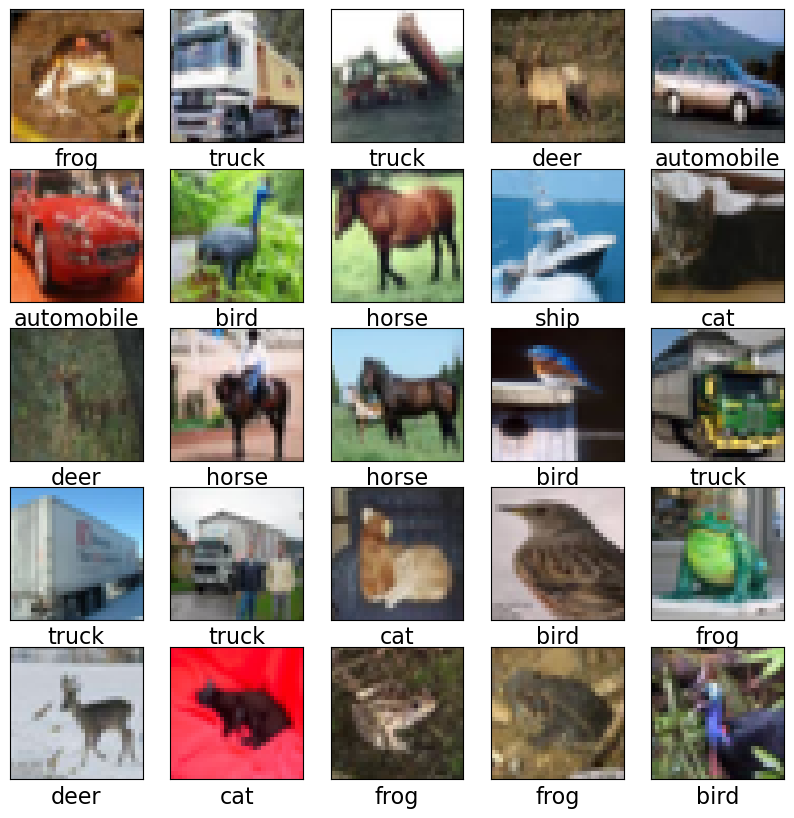

In [6]:
# Definimoc los nombres de las 10 categorías del dataset CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Mostramos las primeras 25 figuras del dataframe
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_images[i], cmap=plt.cm.binary)
    # Las etiquetas CIFAR son matrices por lo que necesitamos un indice adicional
    plt.xlabel(class_names[y_train_labels[i][0]])
plt.show()

In [7]:
# Creamos redes neuronales usando la interfaz model y layers
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='relu'))

model.summary()

c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

De la tabla anterior podemos ver:
* El modelob fabricado tiene varias capas, dos capas convolucionales (Conv2D), dos capas de max pooling (MaxPooling2D), una capa de aplanamiento (Flatten) y tres capas densas (Dense).
* La arquitectura comienza con imágenes de tamaño 28x28x6, que se van reduciendo en tamaño y aumentando en profundidad a medida que pasan por las capas.
* Después de las capas convolucionales y de pooling, los datos se aplanan y pasan por capas densas para la clasificación final.
* El modelo tiene un total de 62.006 parámetros entrenables y 0 parámetros no entrenables.
* La última capa densa tiene 10 salidas, lo que sugiere que el modelo está diseñado para clasificar en 10 categorías diferentes.

Definición de la función de pérdida y optimizador

Usaremos Cross Entropy como función de pérdida y SGD como optimizador con momentum 0.9 y learning rate 0.0001.


In [8]:
# Definimos la función de pérdida y optimizador
# Usaremos Cross Entropy como función de pérdida y SGD como optimizador con momentum 0.9 y learning rate 0.0001.

loss_func = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)

In [9]:
# Entrenamos la red, definiendo los hiperparámetros comunes para ambas redes
epoch_number = 6
batch_size = 4

In [10]:
# Definimos el callback para guardar los checkpoints
keras_path = 'train/checkpoint/demo.weights.h5'
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    keras_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

# Compilamos el modelo
model.compile(optimizer=opt, loss=loss_func,
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
])

# Entrenamos el modelo
history = model.fit(
    x=x_train_images,
    y=y_train_labels,
    batch_size=batch_size,
    epochs=epoch_number,
    shuffle=True,
    validation_split=0.1,
    callbacks=[checkpoint_callback]
)

Epoch 1/6
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.1375 - loss: 2.2877 - val_accuracy: 0.2366 - val_loss: 2.1409
Epoch 2/6
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.2547 - loss: 2.1151 - val_accuracy: 0.3092 - val_loss: 1.9565
Epoch 3/6
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.3315 - loss: 1.9272 - val_accuracy: 0.3566 - val_loss: 1.8498
Epoch 4/6
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.3724 - loss: 1.8249 - val_accuracy: 0.3680 - val_loss: 1.8077
Epoch 5/6
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.3965 - loss: 1.7584 - val_accuracy: 0.4080 - val_loss: 1.7177
Epoch 6/6
11250/11250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4131 - loss: 1.7117 - val_accuracy: 0.4158 - val_loss: 1.6883


In [11]:
# Cargamos los pesos guardados
model.load_weights(keras_path)

# Resultados del entrenamiento

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


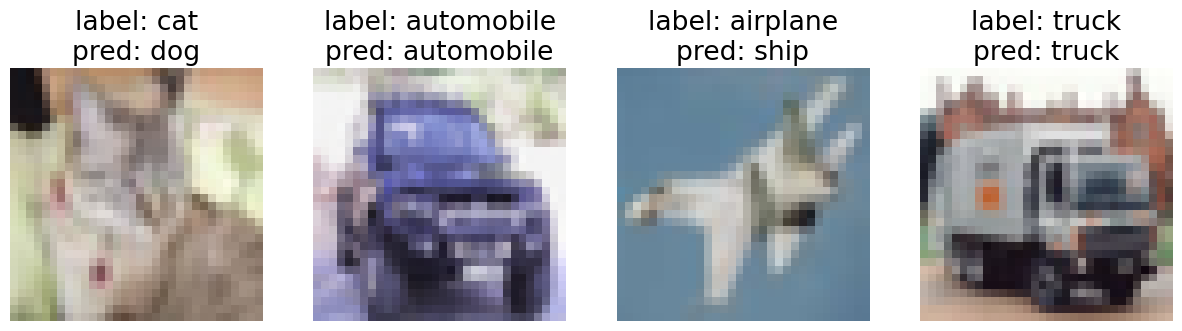

In [12]:
# Primero tomamos cuatro imágenes random del dataset y mostramos tanto los labels reales como los que predijo la red de Keras.
images = [x_test_images[i] for i in range(8, 12)]
labels = [y_test_labels[i] for i in range(8, 12)]

# pasamos las imágenes por la red
outputs = [model.predict(image.reshape((1, 32, 32, 3))) for image in images]
# eligimos la clase con mayor peso
predicted = [np.argmax(out) for out in outputs]

# graficamos las imagenes junto con sus dos labels
fig = plt.figure()
for i in range(4):
  ax = fig.add_subplot(1, 4, i+1)
  image = images[i]
  label = labels[i]
  ax.title.set_text(f'label: {class_names[label[0]]}\npred: {class_names[predicted[i]]}')
  plt.imshow(image)
  plt.axis("off")

In [13]:
# Luego evaluamos los resultados del modelo numericamente con el set de test
test_loss, test_acc = model.evaluate(x_test_images, y_test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.4191 - loss: 1.6915


In [14]:
# Obtenemos las predicciones del modelo
y_pred_probs = model.predict(x_test_images)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertimos a etiquetas de clase

# Nos Asegúramos de que las etiquetas verdaderas estén en el formato correcto
y_true = y_test_labels.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
# Calculamos el accuracy por clase
num_classes = 10
accuracies = []
for i in range(num_classes):
    idx = np.where(y_true == i)[0]  # Índices de la clase i
    acc = np.mean(y_pred[idx] == y_true[idx])
    accuracies.append(acc)

# Imprimimos solo con los nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i, acc in enumerate(accuracies):
    print(f'Accuracy para la clase {class_names[i]}: {acc:.4f}')

Accuracy para la clase airplane: 0.6740
Accuracy para la clase automobile: 0.6300
Accuracy para la clase bird: 0.0190
Accuracy para la clase cat: 0.1570
Accuracy para la clase deer: 0.5420
Accuracy para la clase dog: 0.5480
Accuracy para la clase frog: 0.6330
Accuracy para la clase horse: 0.0000
Accuracy para la clase ship: 0.5640
Accuracy para la clase truck: 0.4240


# Reentrenamiento

Volvemos a entrenar la red, utilizando la misma función de perdida y optimizador, pero usando un learning rate de 0.01 y momentum 0.5.

In [16]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 893,226 (3.41 MB)

 Trainable params: 891,818 (3.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [17]:
# 1. Define el optimizador SGD con learning rate y momentum especificados
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)

# 2. Compila el modelo con la misma función de pérdida y métrica
model.compile(
    optimizer=opt,
    loss=loss_func,  # Usa la misma función de pérdida que antes
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="accuracy")]
)

# 3. Entrena el modelo
history = model.fit(
    x=x_train_images,
    y=y_train_labels,
    batch_size=2,
    epochs=4,
    shuffle=True,
    validation_split=0.1,
    callbacks=[checkpoint_callback]  # Si quieres seguir guardando los mejores pesos
)

Epoch 1/4


c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22500/22500 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.1404 - loss: 2.9512 - val_accuracy: 0.2494 - val_loss: 88.2138
Epoch 2/4
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.1875 - loss: 2.2187 - val_accuracy: 0.2394 - val_loss: 8.4753
Epoch 3/4
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - accuracy: 0.1966 - loss: 2.1949 - val_accuracy: 0.2704 - val_loss: 4.6194
Epoch 4/4
22500/22500 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.2013 - loss: 2.1790 - val_accuracy: 0.2598 - val_loss: 4.9983


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


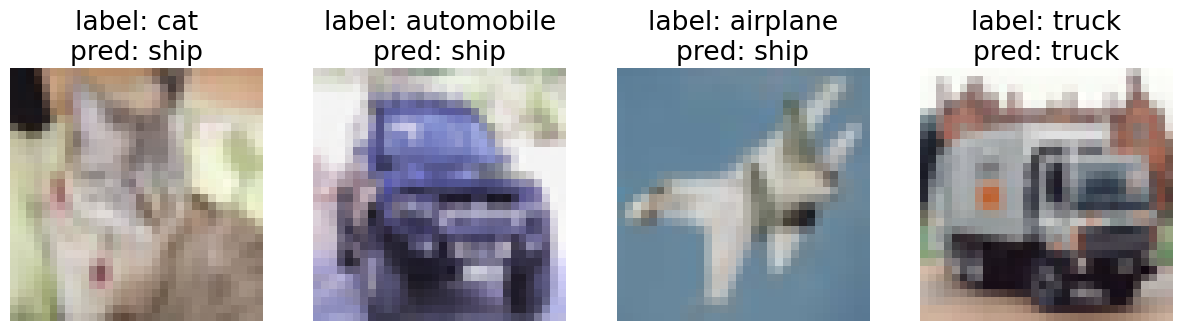

In [18]:
# Primero tomamos cuatro imágenes random del dataset y mostramos tanto los labels reales como los que predijo la red de Keras.
images = [x_test_images[i] for i in range(8, 12)]
labels = [y_test_labels[i] for i in range(8, 12)]

# pasamos las imágenes por la red
outputs = [model.predict(image.reshape((1, 32, 32, 3))) for image in images]
# eligimos la clase con mayor peso
predicted = [np.argmax(out) for out in outputs]

# graficamos las imagenes junto con sus dos labels
fig = plt.figure()
for i in range(4):
  ax = fig.add_subplot(1, 4, i+1)
  image = images[i]
  label = labels[i]
  ax.title.set_text(f'label: {class_names[label[0]]}\npred: {class_names[predicted[i]]}')
  plt.imshow(image)
  plt.axis("off")

In [19]:
# Luego evaluamos los resultados del modelo numericamente con el set de test
test_loss, test_acc = model.evaluate(x_test_images, y_test_labels, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.2676 - loss: 3.9025


In [20]:
# Obtenemos las predicciones del modelo
y_pred_probs = model.predict(x_test_images)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertimos a etiquetas de clase

# Nos Asegúramos de que las etiquetas verdaderas estén en el formato correcto
y_true = y_test_labels.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
# Calculamos el accuracy por clase
num_classes = 10
accuracies = []
for i in range(num_classes):
    idx = np.where(y_true == i)[0]  # Índices de la clase i
    acc = np.mean(y_pred[idx] == y_true[idx])
    accuracies.append(acc)

# Imprimimos solo con los nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

for i, acc in enumerate(accuracies):
    print(f'Accuracy para la clase {class_names[i]}: {acc:.4f}')

Accuracy para la clase airplane: 0.2500
Accuracy para la clase automobile: 0.1470
Accuracy para la clase bird: 0.0960
Accuracy para la clase cat: 0.2390
Accuracy para la clase deer: 0.2610
Accuracy para la clase dog: 0.1520
Accuracy para la clase frog: 0.5340
Accuracy para la clase horse: 0.1850
Accuracy para la clase ship: 0.4500
Accuracy para la clase truck: 0.3620


# Ahora utilizamos otr red del tipo CNN que es más apropiada para clasificar imagenes

**Codificación de etiquetas**

Las etiquetas para el conjunto de datos de entrenamiento y prueba son actualmente categóricas y no continuas. Para incluir conjuntos de datos categóricos en nuestro modelo, nuestras etiquetas deben convertirse a codificaciones one-hot.

Por ejemplo, 2 (pájaro) se convierte en [0,0,1,0,0,0,0,0,0,0] y 7 (caballo) se convierte en [0,0,0,0,0,0,0,1,0,0].

In [22]:
# Transformamos las etiquetas en codificaciones one-hot.
y_train = tf.one_hot(y_train_labels.squeeze().astype(np.int32), depth=10)
y_test = tf.one_hot(y_test_labels.squeeze().astype(np.int32), depth=10)

In [23]:
print("Forma de y_train_labels:", y_train_labels.shape)
print("Forma de y_train después de one-hot:", y_train.shape)
print("Forma de x_train_images:", x_train_images.shape)

Forma de y_train_labels: (50000, 1)
Forma de y_train después de one-hot: (50000, 10)
Forma de x_train_images: (50000, 32, 32, 3)


In [24]:
# Definimos el modelo
batch_size = 32
num_classes = 10
epochs = 50


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])



c:\Users\Felipe\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(x_train_images, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test_images, y_test),
                    verbose=1)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - acc: 0.2461 - loss: 2.0234 - val_acc: 0.4358 - val_loss: 1.5461
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.4390 - loss: 1.5457 - val_acc: 0.5067 - val_loss: 1.3702
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - acc: 0.4949 - loss: 1.4036 - val_acc: 0.5600 - val_loss: 1.2499
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.5408 - loss: 1.2911 - val_acc: 0.5826 - val_loss: 1.1668
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.5755 - loss: 1.2031 - val_acc: 0.6184 - val_loss: 1.0890
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.6016 - loss: 1.1318 - val_acc: 0.6388 - val_loss: 1.0285
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.6219 - loss: 1.0821 - val_acc: 0.6490 - val_loss: 0.9937
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.6424 - loss: 1.0270 - val_acc: 0.6677 - val_loss: 0.9479
Epoch 9/50
1563/1563 ━━━━━━━━━━━

In [27]:
#history = model.fit(x_train_images, y_train, batch_size=batch_size, epochs=epochs)

In [28]:
# Evaluamos el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test_images, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Obtenemos las predicciones
y_pred_probs = model.predict(x_test_images)
y_pred = np.argmax(y_pred_probs, axis=1)  # Clase predicha
y_true = np.argmax(y_test, axis=1)        # Clase real

Test Loss: 0.6423
Test Accuracy: 0.7869
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [29]:
# Calculamos el accuracy por clase
num_classes = 10
accuracies = []
for i in range(num_classes):
    idx = np.where(y_true == i)[0]  # Índices de la clase i
    if len(idx) > 0:  # Verificar que hay muestras de esta clase
        acc = np.mean(y_pred[idx] == y_true[idx])
        accuracies.append(acc)
    else:
        accuracies.append(0.0)

# Imprimimos con los nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print("\n=== ACCURACY POR CLASE ===")
for i, acc in enumerate(accuracies):
    print(f'Accuracy para la clase {class_names[i]}: {acc:.4f}')

print(f'\nAccuracy promedio: {np.mean(accuracies):.4f}')


=== ACCURACY POR CLASE ===
Accuracy para la clase airplane: 0.8660
Accuracy para la clase automobile: 0.8870
Accuracy para la clase bird: 0.7180
Accuracy para la clase cat: 0.5330
Accuracy para la clase deer: 0.7120
Accuracy para la clase dog: 0.6780
Accuracy para la clase frog: 0.9050
Accuracy para la clase horse: 0.8290
Accuracy para la clase ship: 0.8610
Accuracy para la clase truck: 0.8800

Accuracy promedio: 0.7869


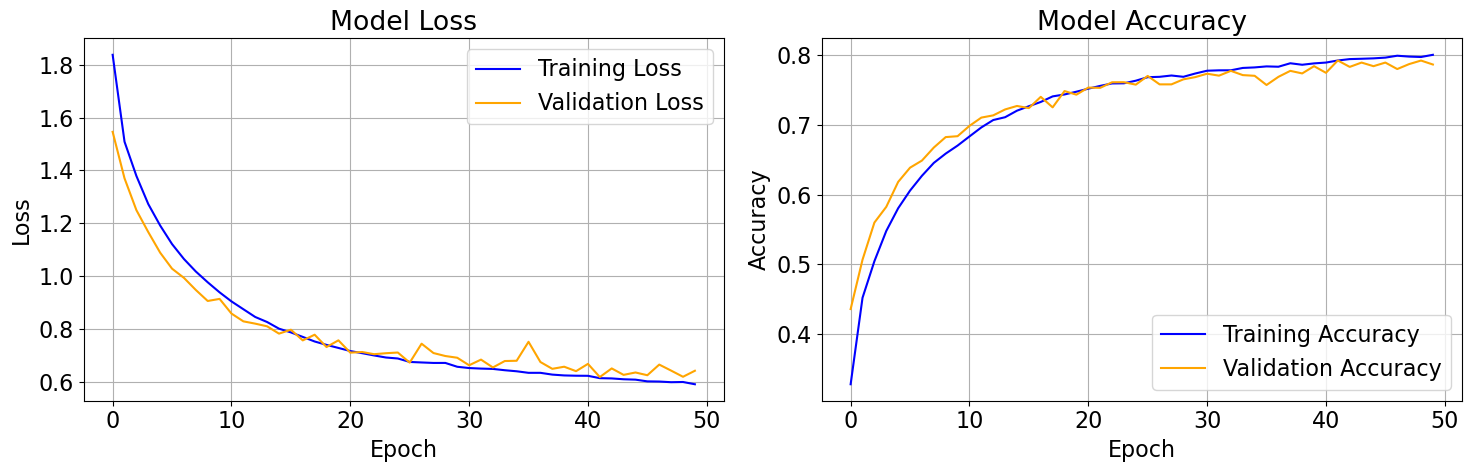

In [30]:
import matplotlib.pyplot as plt

# Creamos las curvas de entrenamiento
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Curva de pérdida
ax1.plot(history.history['loss'], 'b-', label='Training Loss')
if 'val_loss' in history.history:
    ax1.plot(history.history['val_loss'], 'orange', label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Curva de accuracy
ax2.plot(history.history['acc'], 'b-', label='Training Accuracy')
if 'val_acc' in history.history:
    ax2.plot(history.history['val_acc'], 'orange', label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

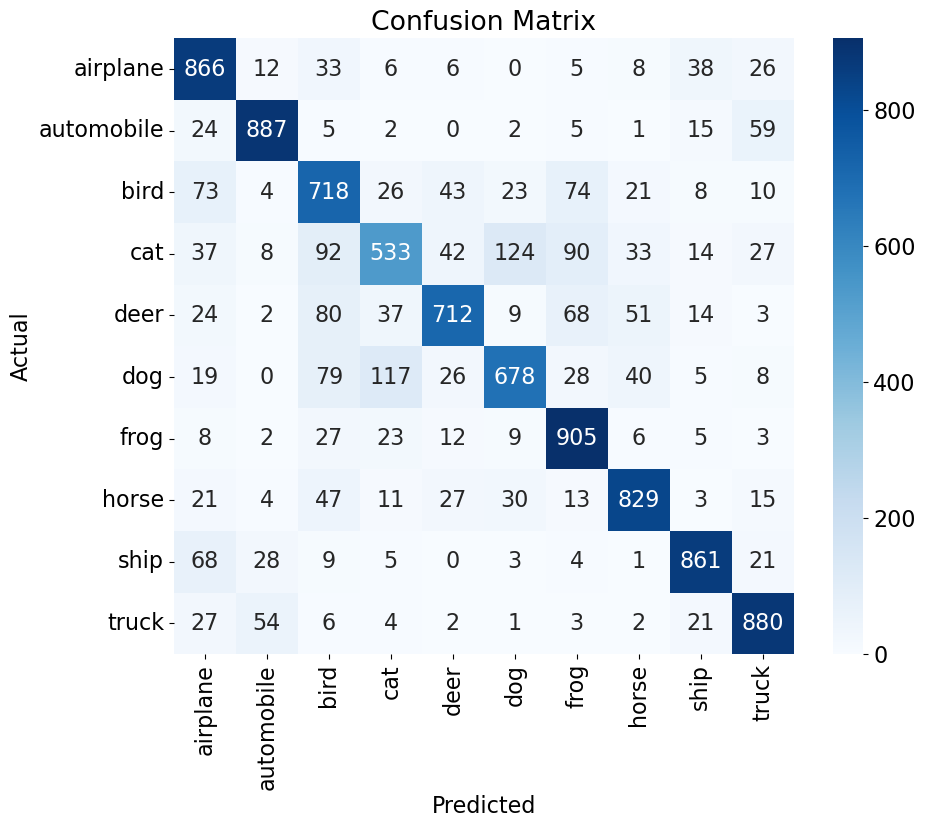


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

    airplane       0.74      0.87      0.80      1000
  automobile       0.89      0.89      0.89      1000
        bird       0.66      0.72      0.69      1000
         cat       0.70      0.53      0.60      1000
        deer       0.82      0.71      0.76      1000
         dog       0.77      0.68      0.72      1000
        frog       0.76      0.91      0.82      1000
       horse       0.84      0.83      0.83      1000
        ship       0.88      0.86      0.87      1000
       truck       0.84      0.88      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Reporte de clasificación
print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_true, y_pred, target_names=class_names))